In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
le=LabelEncoder()
from glob import glob
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
path='C:/Users/Mnight/Downloads/plant-seedlings-classification/train'
impath=path+'/Black-grass/f0a7c51a2.png'

In [4]:
os.listdir(os.path.join(path,os.listdir(path)[0]))

['0050f38b3.png',
 '0183fdf68.png',
 '0260cffa8.png',
 '05eedce4d.png',
 '075d004bc.png',
 '078eae073.png',
 '082314602.png',
 '0ace21089.png',
 '0b228a6b8.png',
 '0b3e7a7a9.png',
 '0bb75ded8.png',
 '0be707615.png',
 '0c67c3fc3.png',
 '0d1a9985f.png',
 '0d28c429b.png',
 '0d4f74f4a.png',
 '0dad57e7f.png',
 '0e91f92a1.png',
 '0fe440ed5.png',
 '1276dffba.png',
 '129c51855.png',
 '13a7f553a.png',
 '14719a83e.png',
 '1576ce9fd.png',
 '163c13912.png',
 '163e571a6.png',
 '16c69a6d8.png',
 '173cec485.png',
 '1a125880e.png',
 '1af1eddd3.png',
 '1d39b8f30.png',
 '1e49633e0.png',
 '20b2cbaed.png',
 '20d4fab57.png',
 '2269e0a1e.png',
 '228d8ad5c.png',
 '22be204a3.png',
 '25daae389.png',
 '260c4eed3.png',
 '26103af9c.png',
 '279ac215b.png',
 '28a707630.png',
 '2aa60045d.png',
 '2ed589264.png',
 '2ee4dad8c.png',
 '2f0ae1b34.png',
 '2f6bc240a.png',
 '3002e5d9d.png',
 '31958c132.png',
 '31f2766cb.png',
 '32d97b170.png',
 '332f68a21.png',
 '34a672a63.png',
 '355cad34c.png',
 '37d85d833.png',
 '39e9bf4c

In [5]:
def greenmask(img):
    imm=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    #imm=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    mask=cv2.inRange(imm,(25,15,15),(75,255,255))
    green=cv2.bitwise_and(imm,imm,mask=mask)
    return green

In [6]:
classes=os.listdir(path)

In [7]:
def getimgs():
    trainds=[]
    for i in classes:
        for j in (glob(path+'/'+i+'/*')):
            img=cv2.imread(j)
            img=cv2.resize(img,(256,256))
            #green=greenmask(img)
            trainds.append([img,i])
    return trainds

In [8]:
greens=getimgs()

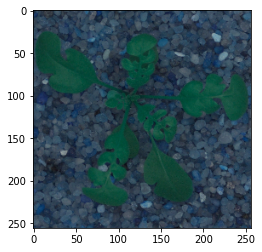

In [9]:
plt.imshow(greens[3800][0])

In [ ]:
path+'/'+

In [10]:
import random
random.shuffle(greens)
x,y=zip(*greens)

In [11]:
y=le.fit_transform(y)
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [12]:
x=np.reshape(x,(-1,256,256,3))

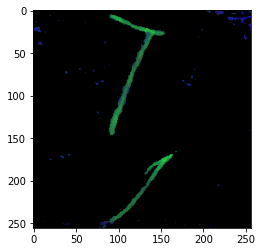

In [13]:
plt.imshow(x[-1])

In [14]:
xtr=x[:3800]
xtest=x[3800:]
ytr=y[:3800]
ytest=y[3800:]

In [15]:
model=tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(256,256,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=4))
model.add(layers.MaxPool2D((2,2),strides=2))
model.add(layers.Conv2D(384,(3,3),padding='same',activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(384,(3,3),padding='same',activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPool2D((3,3),strides=3))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12,activation='softmax'))

In [16]:
from tensorflow.keras.optimizers import Adam
adam=Adam(lr=1e-5)

In [17]:
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics='accuracy')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 384)       442752    
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 384)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 384)       1327488   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 384)       0

In [19]:
hist=model.fit(xtr,ytr,validation_data=(xtest,ytest),epochs=50,batch_size=16)

Epoch 1/50
238/238 [==============================] - 19s 55ms/step - loss: 2.4079 - accuracy: 0.1470 - val_loss: 2.3489 - val_accuracy: 0.2411
Epoch 2/50
238/238 [==============================] - 13s 56ms/step - loss: 2.1944 - accuracy: 0.2428 - val_loss: 2.2024 - val_accuracy: 0.2684
Epoch 3/50
238/238 [==============================] - 13s 56ms/step - loss: 2.0813 - accuracy: 0.2759 - val_loss: 2.0988 - val_accuracy: 0.3284
Epoch 4/50
238/238 [==============================] - 13s 57ms/step - loss: 1.8799 - accuracy: 0.3746 - val_loss: 1.7547 - val_accuracy: 0.4032
Epoch 5/50
238/238 [==============================] - 13s 56ms/step - loss: 1.6263 - accuracy: 0.4313 - val_loss: 1.6092 - val_accuracy: 0.4674
Epoch 6/50
238/238 [==============================] - 13s 56ms/step - loss: 1.5242 - accuracy: 0.4751 - val_loss: 1.5458 - val_accuracy: 0.4726
Epoch 7/50
238/238 [==============================] - 13s 56ms/step - loss: 1.5092 - accuracy: 0.4728 - val_loss: 1.5134 - val_accuracy:

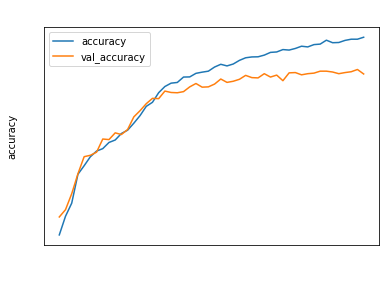

In [26]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')

plt.xlabel('epochs',color='white')
plt.ylabel('accuracy',color='white')
plt.title('adam50,lre-5',color='white',fontsize=20)
plt.tick_params(colors='white')
plt.legend()

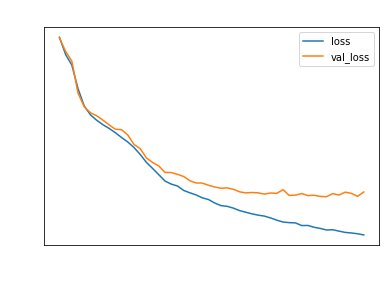

In [27]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('epochs',color='white')
plt.ylabel('loss',color='white')
plt.title('adam50,lre-5',color='white',fontsize=20)
plt.tick_params(colors='white')
plt.legend()